In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Classified Data')
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
df_x = df.iloc[:,1:-1]
df_y = df.iloc[:,-1:]

In [4]:
df_x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
df_x = pd.DataFrame(scaler.fit_transform(df_x),columns=df_x.columns)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
knn.fit(x_train, y_train.values[:,0])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
y_pred = knn.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
print(accuracy_score(y_test, y_pred))

0.9433333333333334


In [13]:
print(confusion_matrix(y_test, y_pred))

[[144  11]
 [  6 139]]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       155
           1       0.93      0.96      0.94       145

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [17]:
knn_error_rate = []
for i in np.arange(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values[:,0])
    knn_error_rate.append(1-accuracy_score(y_test, knn.predict(x_test)))

In [18]:
print(knn_error_rate)

[0.06666666666666665, 0.08333333333333337, 0.06666666666666665, 0.050000000000000044, 0.05666666666666664, 0.05666666666666664, 0.06000000000000005, 0.05666666666666664, 0.06000000000000005, 0.06000000000000005, 0.05666666666666664, 0.06000000000000005, 0.06333333333333335, 0.06333333333333335, 0.06000000000000005, 0.05666666666666664, 0.050000000000000044, 0.050000000000000044, 0.053333333333333344, 0.053333333333333344, 0.053333333333333344, 0.053333333333333344, 0.06000000000000005, 0.05666666666666664, 0.05666666666666664, 0.06000000000000005, 0.05666666666666664, 0.06000000000000005, 0.05666666666666664, 0.05666666666666664, 0.05666666666666664, 0.053333333333333344, 0.06000000000000005, 0.06000000000000005, 0.06000000000000005, 0.06000000000000005, 0.06000000000000005, 0.06000000000000005, 0.06000000000000005]


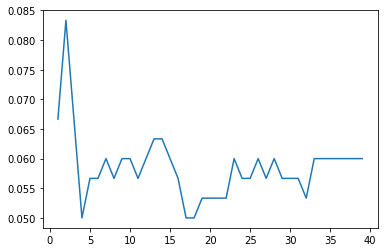

In [19]:
sns.lineplot(y=knn_error_rate, x=np.arange(1,40))
plt.show()

In [20]:
for i in [1, 28]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.values[:,0])
    y_pred = knn.predict(x_test)
    print('For',i)
    print('accuracy score', accuracy_score(y_test, y_pred))
    print('confusion matrix', confusion_matrix(y_test, y_pred))
    print('classification report', classification_report(y_test, y_pred))

For 1
accuracy score 0.9333333333333333
confusion matrix [[145  10]
 [ 10 135]]
classification report               precision    recall  f1-score   support

           0       0.94      0.94      0.94       155
           1       0.93      0.93      0.93       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

For 28
accuracy score 0.94
confusion matrix [[143  12]
 [  6 139]]
classification report               precision    recall  f1-score   support

           0       0.96      0.92      0.94       155
           1       0.92      0.96      0.94       145

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

